# evaluomeR Step 0

In [51]:
library("evaluomeR")
library("psych")
library("scales")
library("caret")

options(scipen=10)

In [52]:
# https://www.r-data-scientist.com/es/blog/statistical-tests/bartlett-test/
# https://www.r-data-scientist.com/es/blog/statistical-tests/kaiser-meyer-olkin-test/

# Table of contents
* [PCA](#pca)
* [Bartlett Sphericity Test](#bartlett)
    * [Bartlett Sphericity Test - Conclusiones](#bartlett-conclusion)
* [Kaiser-Meyer-Olkin Test](#kmo)
* [References](#references)

# PCA <a class="anchor" id="pca"></a>

In [53]:
# data("rnaMetrics")
seed = 13606
scaled = FALSE
k.range=c(2,6)
set.seed(seed)
#input_df = read.csv(paste0(getwd(), "/","../../usecases/usecase2/data/agro.csv"), header=TRUE, stringsAsFactors=FALSE)
input_df = read.csv(paste0(getwd(), "/","../../usecases/usecase2/data/obo-119.csv"), header=TRUE, stringsAsFactors=FALSE)
#input_df = as.data.frame(assay(rnaMetrics))
data = input_df[-1]

In [54]:
if (scaled) {
    data = scales::rescale(as.matrix(data), to=c(0,1))
}
head(data)

ANOnto,AROnto,CBOOnto,CBOOnto2,CROnto,DITOnto,INROnto,LCOMOnto,NACOnto,NOCOnto,NOMOnto,POnto,PROnto,RFCOnto,RROnto,TMOnto,TMOnto2,WMCOnto,WMCOnto2
0.9920319,0.000000,1.0677291,1.0677291,0.003984064,13,1.0677291,6.258065,1.089744,2.821053,0.4462151,1.0637450,0.2947368,1.5139442,0.7052632,0.068000000,2.117647,7.461538,1.192308
0.9907407,3.101852,1.0694444,1.0694444,0.363425926,16,1.0694444,7.695971,1.052174,2.287129,1.2037037,1.0555556,0.5295316,2.2731481,0.4704684,0.062645012,2.148148,9.134783,1.186957
1.0263930,0.000000,1.0000000,1.0000000,0.002932551,9,1.0000000,3.914179,1.003745,4.608108,0.0000000,0.8914956,0.0000000,1.0000000,1.0000000,0.002941176,2.000000,3.928839,1.003745
1.2913386,3.503937,1.0157480,1.0157480,0.212598425,8,1.0157480,4.602151,1.022222,3.486486,3.2677165,1.0078740,0.7628676,4.2834646,0.2371324,0.047619048,2.000000,4.755556,1.033333
0.9722222,0.000000,0.9722222,0.9722222,0.000000000,7,0.9722222,4.904762,1.000000,2.333333,0.0000000,0.9444444,0.0000000,0.9722222,1.0000000,0.000000000,0.000000,4.904762,1.000000
1.0948905,0.000000,1.3357664,1.3357664,0.007299270,5,1.3357664,2.968944,1.302083,4.463415,1.2335766,0.8978102,0.4801136,2.5693431,0.5198864,0.000000000,0.000000,4.979167,1.677083


In [55]:
data.pca = princomp(data, cor = TRUE)
# Calcular la proporción acumulada de la varianza explicada de los factores
parte.pca <- data.pca$sdev^2/sum(data.pca$sdev^2)*100

In [56]:
print(parte.pca)

      Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
3.133963e+01 1.769217e+01 1.071152e+01 9.965851e+00 6.334460e+00 5.676066e+00 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
5.205313e+00 3.568967e+00 3.065736e+00 2.665487e+00 1.672320e+00 9.697028e-01 
     Comp.13      Comp.14      Comp.15      Comp.16      Comp.17      Comp.18 
7.247634e-01 3.888385e-01 1.835784e-02 8.185915e-04 1.838596e-15 1.628800e-16 
     Comp.19 
0.000000e+00 


In [57]:
print(cumsum(parte.pca))

   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
 31.33963  49.03180  59.74332  69.70917  76.04363  81.71970  86.92501  90.49398 
   Comp.9   Comp.10   Comp.11   Comp.12   Comp.13   Comp.14   Comp.15   Comp.16 
 93.55971  96.22520  97.89752  98.86722  99.59199  99.98082  99.99918 100.00000 
  Comp.17   Comp.18   Comp.19 
100.00000 100.00000 100.00000 


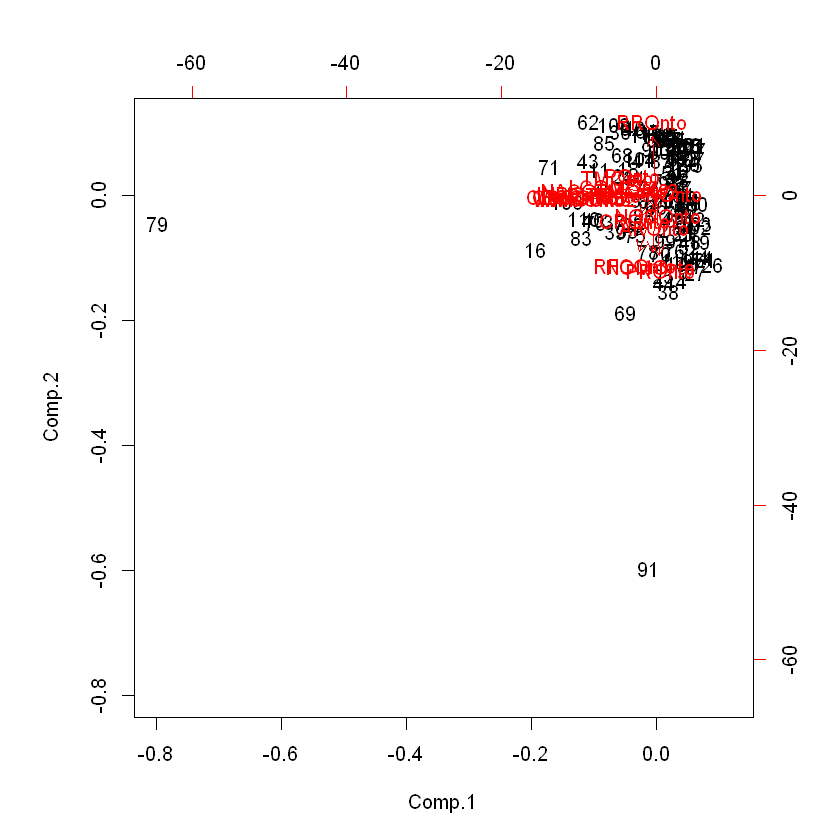

In [58]:
# Representación gráfica del PCA
biplot(data.pca)

# Bartlett Sphericity Test <a class="anchor" id="bartlett"></a>

In [59]:
R = cor(data)
#print(correlations)

In [60]:
R

,ANOnto,AROnto,CBOOnto,CBOOnto2,CROnto,DITOnto,INROnto,LCOMOnto,NACOnto,NOCOnto,NOMOnto,POnto,PROnto,RFCOnto,RROnto,TMOnto,TMOnto2,WMCOnto,WMCOnto2
ANOnto,1.000000000,-0.024159127,-0.114160981,-0.114160981,-0.139373499,-0.294768202,-0.110779620,-0.3075771383,-0.17930987,0.093276309,-0.101673093,0.38873547,0.118256309,-0.12199832,-0.118256309,0.13515249,0.0664143218,-0.005817731,-0.001813093
AROnto,-0.024159127,1.000000000,0.006109972,0.006109972,0.018910110,0.171233042,-0.029435115,0.2089147219,-0.02748452,-0.065038653,0.262292865,-0.01314738,0.262873140,0.25742995,-0.262873140,-0.10615419,-0.1328694664,-0.007930807,-0.010735583
CBOOnto,-0.114160981,0.006109972,1.000000000,1.000000000,0.151252450,0.489034218,0.943343086,0.3068560112,0.86446340,0.042399184,0.016303412,0.18988776,-0.019509225,0.21459945,0.019509225,0.39155759,0.1695368781,0.793126917,0.788009558
CBOOnto2,-0.114160981,0.006109972,1.000000000,1.000000000,0.151252450,0.489034218,0.943343086,0.3068560112,0.86446340,0.042399184,0.016303412,0.18988776,-0.019509225,0.21459945,0.019509225,0.39155759,0.1695368781,0.793126917,0.788009558
CROnto,-0.139373499,0.018910110,0.151252450,0.151252450,1.000000000,0.269467553,0.176002859,0.1655639095,0.04001342,-0.007100867,0.119692822,0.03411915,0.262287440,0.14696967,-0.262287440,-0.10441417,0.0458093444,0.282694371,0.282840643
DITOnto,-0.294768202,0.171233042,0.489034218,0.489034218,0.269467553,1.000000000,0.446623864,0.8264292652,0.43360911,-0.171509165,0.009904869,0.19290675,-0.018071345,0.10683366,0.018071345,0.26319368,0.1529288829,0.345142358,0.334760617
INROnto,-0.110779620,-0.029435115,0.943343086,0.943343086,0.176002859,0.446623864,1.000000000,0.2945191157,0.88797350,0.067962523,0.003297389,0.15960810,-0.081227259,0.19063851,0.081227259,0.37650058,0.1418682443,0.868802298,0.862995938
LCOMOnto,-0.307577138,0.208914722,0.306856011,0.306856011,0.165563909,0.826429265,0.294519116,1.0000000000,0.36999386,-0.168150702,-0.018676017,0.21634471,-0.149084700,0.04272091,0.149084700,0.20308810,-0.0007221436,0.134684935,0.119358553
NACOnto,-0.179309872,-0.027484518,0.864463400,0.864463400,0.040013420,0.433609108,0.887973497,0.3699938615,1.00000000,0.077353728,0.020588758,0.18089347,-0.086258462,0.19185795,0.086258462,0.51366893,0.1787315877,0.552717898,0.543014849
NOCOnto,0.093276309,-0.065038653,0.042399184,0.042399184,-0.007100867,-0.171509165,0.067962523,-0.1681507023,0.07735373,1.000000000,0.047661584,-0.27061609,0.211046984,0.05498096,-0.211046984,-0.15474978,-0.1912189782,0.039390629,0.034514990


In [61]:
cor_metrics = findCorrelation(R, cutoff = 0.95, verbose = FALSE, names=TRUE)
cor_metrics

[1] "CBOOnto" "WMCOnto" "RFCOnto" "RROnto"

In [62]:
R = R[, !colnames(R) %in% cor_metrics]
R = R[!rownames(R) %in% cor_metrics, ]
ncol(R)
nrow(R)

[1] 15

[1] 15

In [63]:
print(cortest.bartlett(R, n = nrow(data)))

$chisq
[1] 1441.891

$p.value
[1] 1.158353e-233

$df
[1] 105



## Bartlett Sphericity Test  - Conclusion<a class="anchor" id="bartlett-conclusion"></a>

Se rechaza la hipótesis nula al nivel del 5% (valor p=0<0.05). Por lo tanto, se puede realizar de manera eficiente un PCA en el conjunto de datos.

**Nota**:
La prueba de Bartlett tiene un gran inconveniente. Tiende a ser siempre estadísticamente significativo cuando aumenta el número de instancias n.

Algunas referencias aconsejan utilizar esta prueba solo si la relación n:p (número de instancias dividido entre el número de variables) es inferior a 5.

In [64]:
# Relación n:p es 4.10:
nrow(data)/ncol(data)

[1] 6.263158

# Kaiser-Meyer-Olkin Test <a class="anchor" id="kmo"></a>


In [65]:
R = cor(data)

In [66]:
R = R[, !colnames(R) %in% cor_metrics]
R = R[!rownames(R) %in% cor_metrics, ]
ncol(R)
nrow(R)

[1] 15

[1] 15

In [67]:
kmo_value = psych::KMO(R)

In [68]:
kmo_value$MSA

[1] 0.5983328

La matriz de correlación parcial se puede obtener a partir de la matriz de correlación. Se calcula la inversa de esta última:

![equation](https://latex.codecogs.com/svg.image?R^{-1}=(v)_{ij})

Si el índice KMO es alto (≈1), el PCA puede actuar de manera eficiente.
Si el índice KMO es bajo (≈0), el PCA no es relevante.

# Method

In [69]:
# Assuming first column is the 'description' one
# Try catch: Try KMO, if won't work find correlations, cut them off, and retry
correlation_tests <- function(input_data, cutoff=0.95) {
    
    data = input_df[-1] # Removing 'description' column
    R = cor(data) # Correlations
    cor_metrics = findCorrelation(R, cutoff = cutoff, verbose = FALSE, names=TRUE)
    # Removes highly correlated metrics from R
    R = R[, !colnames(R) %in% cor_metrics]
    R = R[!rownames(R) %in% cor_metrics, ]
    
    r_bartlett = psych::cortest.bartlett(R, n = nrow(data))
    print(paste0("Bartlett p-value: ", r_bartlett$p.value))

    r_kmo = psych::KMO(R)
    print(paste0("KMO value: ", r_kmo$MSA))
    
    cleaned_df = input_df[, !colnames(input_df) %in% cor_metrics]

    result = NULL
    result$pca = (r_bartlett$p.value < 0.05) && (r_kmo$MSA >= 0.5)
    result$bartlett = r_bartlett$p.value
    result$kmo = r_kmo$MSA
    result$removed_metrics = cor_metrics
    result$data = cleaned_df
    return(result)
}

In [70]:
#input_df = read.csv(paste0(getwd(), "/","../../usecases/usecase2/data/agro.csv"), header=TRUE, stringsAsFactors=FALSE)
input_df = read.csv(paste0(getwd(), "/","../../usecases/usecase2/data/obo-119.csv"), header=TRUE, stringsAsFactors=FALSE)

result = correlation_tests(input_df, cutoff=0.98)
names(result)


[1] "Bartlett p-value: 1.15835303183017e-233"
[1] "KMO value: 0.598332800207232"


[1] "pca"             "bartlett"        "kmo"             "removed_metrics"
[5] "data"

In [71]:
result$removed_metrics

[1] "CBOOnto" "WMCOnto" "RFCOnto" "RROnto"

In [72]:
result$removed_metrics

[1] "CBOOnto" "WMCOnto" "RFCOnto" "RROnto"

# PCA

In [73]:
# PCA ahora
data.pca = princomp(result$data[-1], cor = TRUE)
# Calcular la proporción acumulada de la varianza explicada de los factores
parte.pca <- data.pca$sdev^2/sum(data.pca$sdev^2)*100

     Comp.1      Comp.2      Comp.3      Comp.4      Comp.5      Comp.6 
29.19582197 14.24746933 11.73007490 11.31380902  7.12145634  6.72491716 
     Comp.7      Comp.8      Comp.9     Comp.10     Comp.11     Comp.12 
 5.71170042  4.11156710  3.27977457  2.51260640  1.78895131  1.17054265 
    Comp.13     Comp.14     Comp.15 
 0.68471284  0.38549300  0.02110299 
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
 29.19582  43.44329  55.17337  66.48718  73.60863  80.33355  86.04525  90.15682 
   Comp.9   Comp.10   Comp.11   Comp.12   Comp.13   Comp.14   Comp.15 
 93.43659  95.94920  97.73815  98.90869  99.59340  99.97890 100.00000 


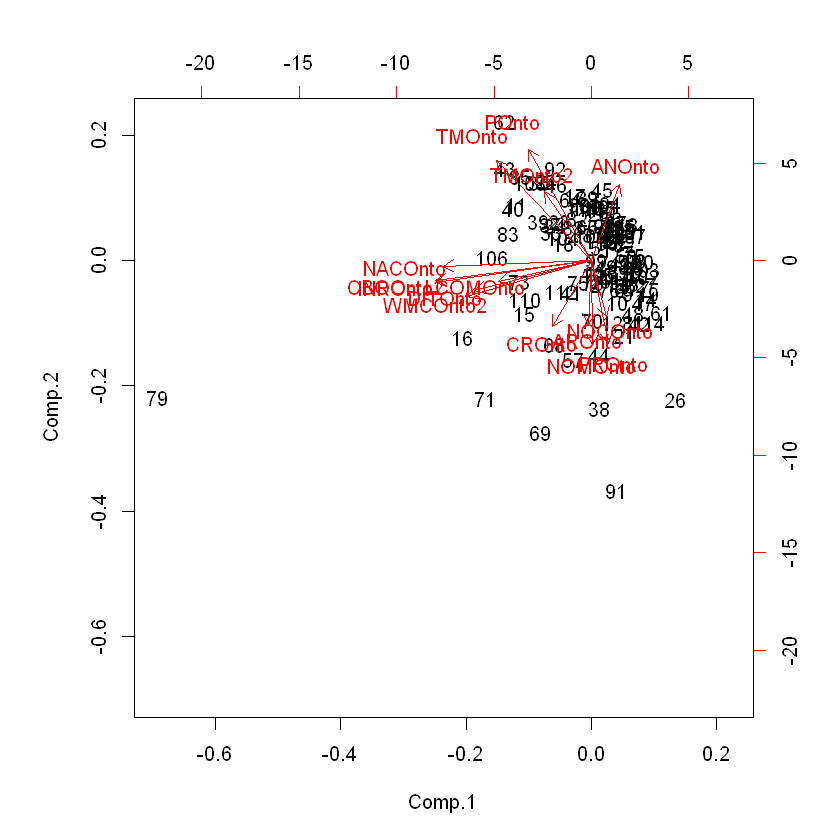

In [74]:
# Representación gráfica del PCA
print(parte.pca)
print(cumsum(parte.pca))
biplot(data.pca)

# References <a class="anchor" id="references"></a>

<a id="1">[1]</a>
https://www.r-data-scientist.com/es/blog/statistical-tests/bartlett-test/

<a id="2">[2]</a>
https://www.r-data-scientist.com/es/blog/statistical-tests/kaiser-meyer-olkin-test/
